In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from numpy import genfromtxt
from scipy import ndimage

import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook

In [6]:
def plot2TracksByTrackId(data,trackId,data2,trackId2,color='intensity',color2='intensity',title='',filename=''):
    track = data[data['TrackID'] == trackId]
    plt.figure(dpi=300)
    ax = plt.axes(projection='3d')
    plt.title(title)
    # Data for a three-dimensional line
    x = track['Position X'].values
    y = track['Position Y'].values
    z = track['Position Z'].values
    intensity = track['Value'].values
    ax.plot3D(x, y, z, 'gray')
    
    # Data for three-dimensional scattered points
    #zdata = 15 * np.random.random(100)
    #xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
    #ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
    #ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    if(color=='intensity'):
        ax.scatter3D(x, y, z, c=intensity, cmap='cool',s=100);
    else:
        ax.scatter3D(x, y, z, c=color, cmap='cool',s=100);
    
    #------------------------------------------------------------------------------------
    # the second one
    data = data2
    trackId = trackId2
    color = color2
    
    track = data[data['TrackID'] == trackId]
#    plt.figure(dpi=300)
#    ax = plt.axes(projection='3d')
    
    # Data for a three-dimensional line
    x = track['Position X'].values
    y = track['Position Y'].values
    z = track['Position Z'].values
    intensity = track['Value'].values
    ax.plot3D(x, y, z, 'gray')
    
    # Data for three-dimensional scattered points
    #zdata = 15 * np.random.random(100)
    #xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
    #ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
    #ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    if(color=='intensity'):
        ax.scatter3D(x, y, z, c=intensity, cmap='cool',s=100);
    else:
        ax.scatter3D(x, y, z, c=color, cmap='cool',s=100);
        
    if(filename!=''):
        plt.savefig(filename)
        plt.close()

In [8]:
def plot2TracksByTrackId_intensity(data_chc,trackId_chc,data_dnm,trackId_dnm,color='magenta',color2='lime',title='',filename=''):

    plt.figure(dpi=300)
    track_chc = data_chc[data_chc['TrackID'] == trackId_chc].sort_values(by=['Time'],ascending=True)
    
    
    
    plt.title(title)
    
    x = track_chc['Time'].values
#    y = track_chc['Value'].values
    y = ndimage.median_filter(track_chc['Value'].values,3)
    
    plt.plot(x,y,c="magenta")
    
    #---
    
    track_dnm = data_dnm[data_dnm['TrackID'] == trackId_dnm].sort_values(by=['Time'],ascending=True)
    
    
    x = track_dnm['Time'].values
#    y = track_dnm['Value'].values
    y = ndimage.median_filter(track_dnm['Value'].values,3)
    #print("x",x,"y",y)
    
    plt.plot(x,y,c="lime")
    
           
    if(filename!=''):
        plt.savefig(filename)
        plt.close()

# read in the data

In [9]:
#intensity_chc = genfromtxt('S3P8-1-Intenstity_median_ch1_Clathrin.csv', delimiter=',')
#position_chc = genfromtxt('S3P8-1-position_Clathrin.csv', delimiter=',')
intensity_chc = pd.read_csv('S3P8-1-Intenstity_median_ch1_Clathrin.csv',header=1)
intensity_chc = intensity_chc.drop(['Unit'],axis=1)
position_chc = pd.read_csv('S3P8-1-position_Clathrin.csv',header=1)
#on=['key1', 'key2']
data_chc = pd.merge(intensity_chc, position_chc,  on=['ID','TrackID','Category','Time']) #how='inner',
data_chc[0:5]

,Value,Category,Channel,Time,TrackID,ID,Position X,Position Y,Position Z,Unit,Collection
0,9167.00,Spot,1,1,1000000000,1,7.74,9.18,7.08,um,Position
1,6507.99,Spot,1,1,1000000001,2,14.58,17.24,8.04,um,Position
2,9151.52,Spot,1,1,1000000002,5,10.57,5.53,10.03,um,Position
3,6769.51,Spot,1,1,1000000003,7,8.16,18.44,11.64,um,Position
4,9039.18,Spot,1,1,1000000004,12,17.61,22.02,25.95,um,Position


In [10]:
intensity_dnm = pd.read_csv('S3P8-1-Intenstity_median_dynamin.csv',header=1)
intensity_dnm = intensity_dnm.drop(['Unit'],axis=1)
position_dnm = pd.read_csv('S3P8-1-position_dynamin.csv',header=1)
data_dnm = pd.merge(intensity_dnm, position_dnm,  on=['ID','TrackID','Category','Time']) #how='inner',
data_dnm[0:5]

,Value,Category,Channel,Time,TrackID,ID,Position X,Position Y,Position Z,Unit,Collection
0,12883.60,Spot,1,1,1000000000,4,21.27,7.18,8.20,um,Position
1,11240.30,Spot,1,1,1000000001,6,10.51,5.50,9.25,um,Position
2,7850.80,Spot,1,1,1000000002,7,7.53,17.50,10.67,um,Position
3,8458.15,Spot,1,1,1000000003,8,11.84,16.14,15.17,um,Position
4,9008.04,Spot,1,1,1000000004,11,8.55,17.26,28.21,um,Position


In [11]:

a = [ 8.16  ,     18.44 ,11.64 ]
b = [  27.98   ,    31.52  , 40.74]
def distance(a,b):
    dist = np.sqrt((a[0]-b[0])*(a[0]-b[0])+(a[1]-b[1])*(a[1]-b[1])+(a[2]-b[2])*(a[2]-b[2]))
    return dist

print(distance(a,b))

37.5596698601


In [12]:
df_selectTracksDistanceMatrix = pd.read_csv("selectTracksDistanceMatrix.csv")
df_selectTracksDistanceMatrix[0:5]

,Unnamed: 0,trackId_chc,len(track_chc),trackId_dnm,len(trackId_dnm),timeIntersection,len(timeIntersection),trackDistance
0,0,1000000318,59,1000000219,14,[ 1 3 4 5 6 7 8 9 10 11 12 13 14],13,1.663
1,1,1000000495,13,1000000268,8,[2 5 7 8],4,2.540
2,2,1000000937,16,1000001677,5,[48 49 50 51],4,2.554
3,3,1000000723,9,1000000617,12,[16 17 18],3,2.614
4,4,1000001023,4,1000001702,5,[49 50 51 52],4,4.431


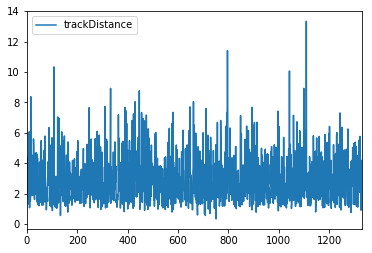

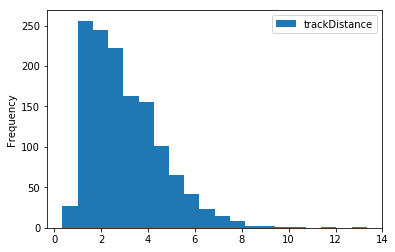

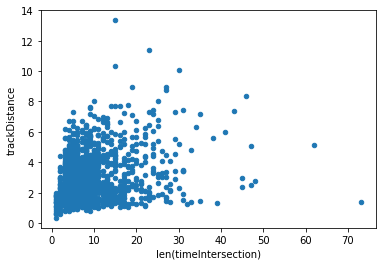

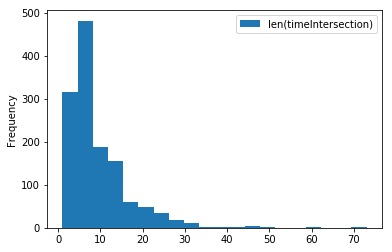

In [13]:
df_selectTracksDistanceMatrix[['trackDistance']].plot()
df_selectTracksDistanceMatrix[['trackDistance']].plot.hist(bins=20)
df_selectTracksDistanceMatrix.plot.scatter(x='len(timeIntersection)',y='trackDistance')
df_selectTracksDistanceMatrix[['len(timeIntersection)']].plot.hist(bins=20)

# plot the top traces from the analysis

In [97]:
#bestTracks = df_selectTracksDistanceMatrix.sort_values(by=['len(timeIntersection)','trackDistance', ],ascending=[False,True])[0:5]
#bad, 
#bestTracks = df_selectTracksDistanceMatrix.sort_values(by=['trackDistance'],ascending=[True])[0:5]

tmpTracks = df_selectTracksDistanceMatrix[df_selectTracksDistanceMatrix['len(timeIntersection)'] > 10]
tmpTracks = tmpTracks[tmpTracks['len(track_chc)'] > 10]
tmpTracks = tmpTracks[tmpTracks['len(trackId_dnm)'] > 10]

bestTracks = tmpTracks.sort_values(by=['trackDistance'],ascending=[True])


#bestTracks = df_selectTracksDistanceMatrix
#bestTracks.to_csv("allTracks.csv")

bestTracks_trackIds = bestTracks[['trackId_chc','trackId_dnm']].values #[0:20]
print(len(bestTracks))

bestTracks[0:5]

398


,Unnamed: 0,trackId_chc,len(track_chc),trackId_dnm,len(trackId_dnm),timeIntersection,len(timeIntersection),trackDistance
480,480,1000000660,11,1000000625,81,[12 13 14 15 16 17 18 19 20 21 22],11,0.976
1050,1050,1000000059,32,1000000999,12,[21 22 23 24 25 26 27 28 29 30 31],11,1.037
422,422,1000000124,11,1000000085,15,[ 1 2 3 4 5 6 7 8 9 10 11],11,1.040
1208,1208,1000000317,63,1000000220,18,[ 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 ...,18,1.043
371,371,1000001147,11,1000001379,63,[75 76 77 78 79 80 81 82 83 84 85],11,1.063


In [95]:

#print(bestTracks_trackIds)
i = 0
for trackIdPair in bestTracks_trackIds:#[0:2]:
    trackId_chc, trackId_dnm = trackIdPair
    #print(trackId_chc, trackId_dnm)
    title = str(i)+"trackId_chc: "+str(trackId_chc)+" trackId_dnm: "+str(trackId_dnm)
    filename = title+".png"
    plot2TracksByTrackId(data_chc,trackId_chc,data_dnm,trackId_dnm,color='magenta',color2='lime',title=title,filename=filename)
    filename = title+"_intensity.png"
    plot2TracksByTrackId_intensity(data_chc,trackId_chc,data_dnm,trackId_dnm,color='magenta',color2='lime',title=title,filename=filename)
    i = i+1

# make an average of the top traces in time, matched by the maximum and see what the plot looks like

In [65]:
# find the time of the maximum chc concentration in a track

i = 3
for trackIdPair in bestTracks_trackIds[2:4]:
    trackId_chc, trackId_dnm = trackIdPair
    
    data = data_chc
    trackId = trackId_chc
    track = data[data['TrackID'] == trackId]

    time = track[['Time','Value']].values
    
    print(track['Value'].idxmax())
    maxTime = track.loc[track['Value'].idxmax()]['Time']
    print(time)
    print(maxTime)
#    intensity = track['Value'].values
    
    
    
#    plot2TracksByTrackId(data_chc,trackId_chc,data_dnm,trackId_dnm,color='magenta',color2='lime',title=title,filename=filename)
#    filename = title+"_intensity.png"
#    plot2TracksByTrackId_intensity(data_chc,trackId_chc,data_dnm,trackId_dnm,color='magenta',color2='lime',title=title,filename=filename)
    i = i+1

11311
[[   36.    6030.74]
 [   37.    6948.36]
 [   38.    6571.8 ]
 [   39.    6226.57]
 [   40.    5574.08]
 [   41.    6103.49]
 [   42.    6630.46]
 [   43.    5427.13]
 [   44.    5311.35]
 [   45.    4973.08]
 [   46.    5245.04]
 [   47.    3860.12]
 [   48.    8440.88]
 [   49.    5402.82]
 [   50.    4722.69]
 [   51.    5154.41]]
48
6748
[[   16.    5462.35]
 [   17.    6433.8 ]
 [   18.    7100.39]
 [   19.    6192.53]
 [   20.    6791.07]
 [   21.    5527.98]
 [   22.    6372.17]
 [   23.    6466.13]
 [   24.    6328.32]]
18


/Users/johannesschoeneberg/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/johannesschoeneberg/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/johannesschoeneberg/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/johannesschoeneberg/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/johannesschoeneberg/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


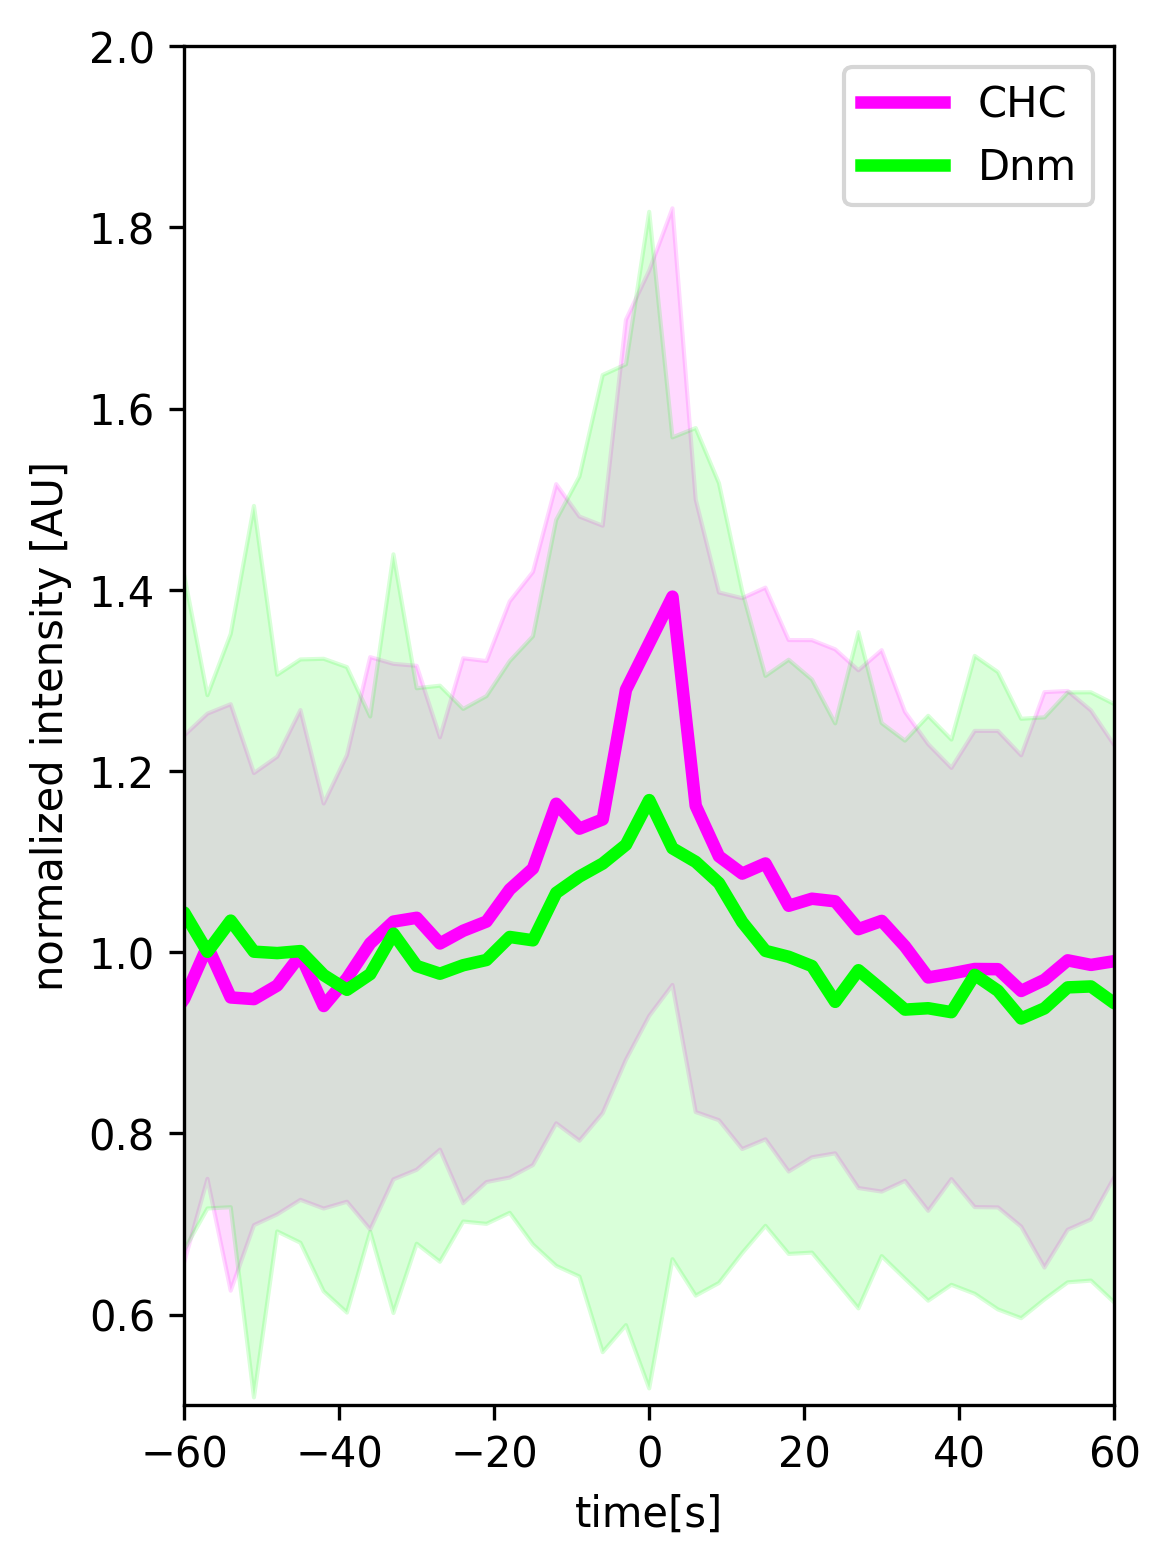

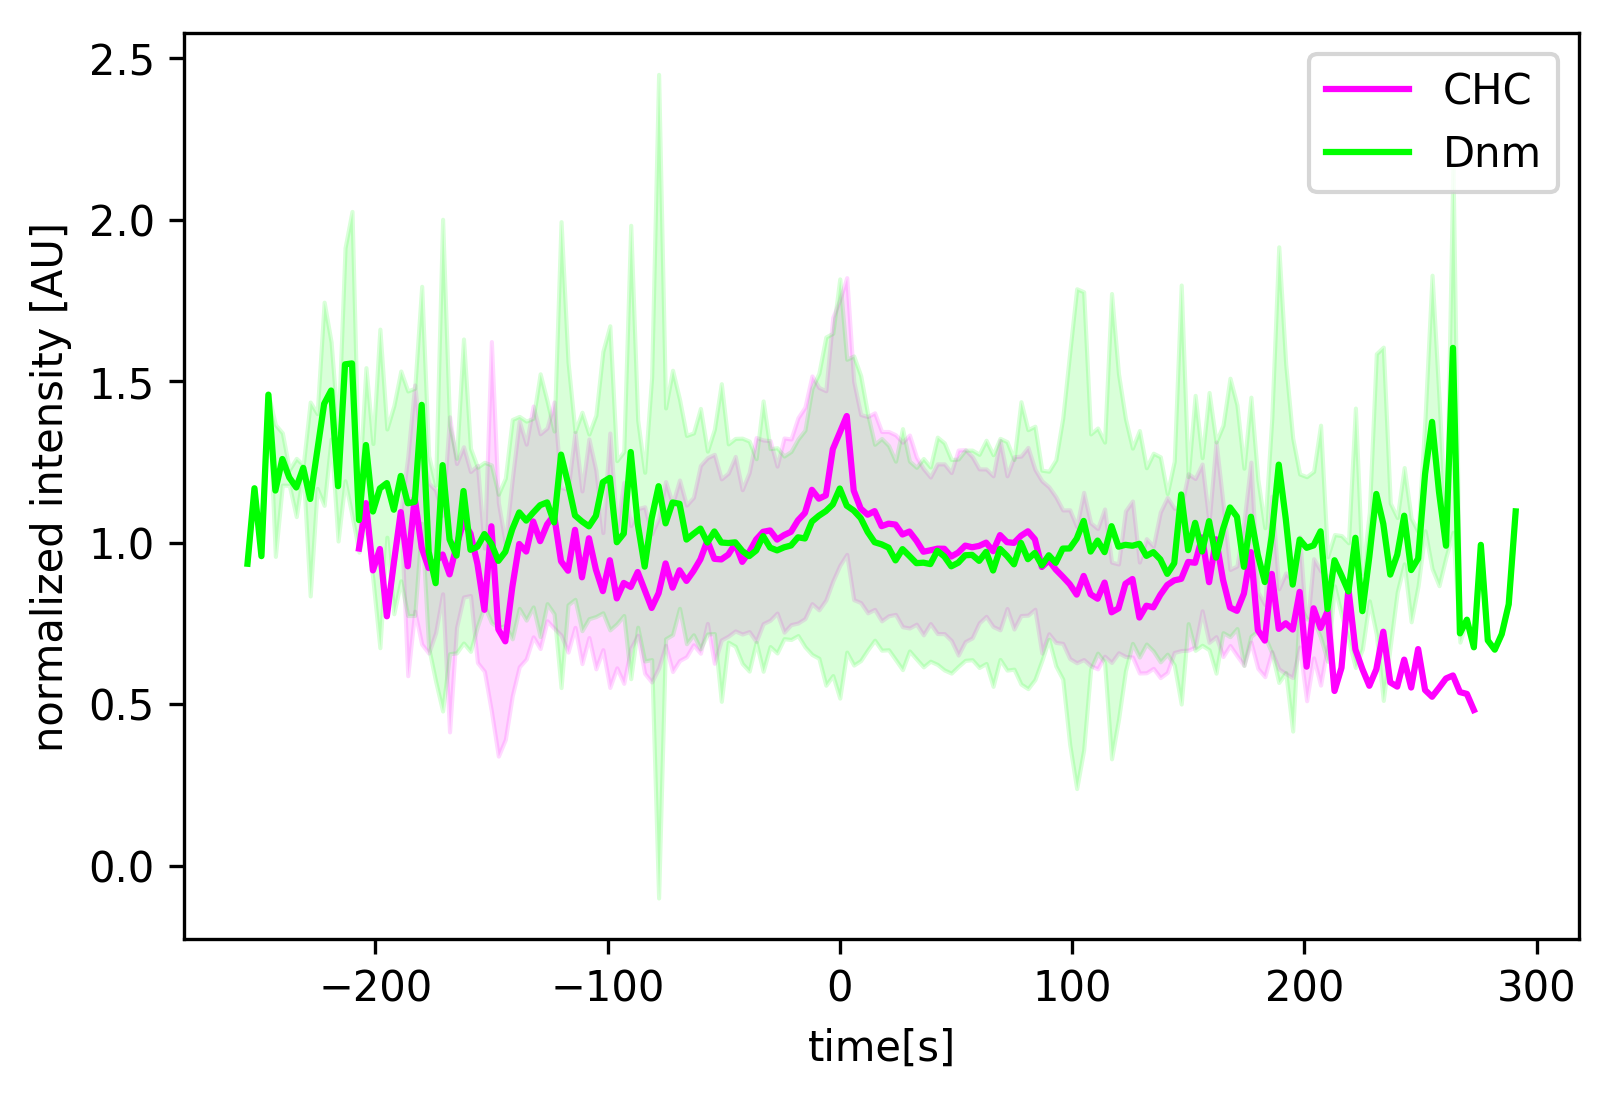

In [119]:
# try to get the mean and stddev 

medianFilterSize = 3

# put the length at 2x the length of the movie
accumulatorLenght = 200

accumulator_chc = [[] for _ in range(accumulatorLenght)]
mean_chc = [0] * accumulatorLenght
stddev_chc = [0] * accumulatorLenght

accumulator_dnm = [[] for _ in range(accumulatorLenght)]
mean_dnm = [0] * accumulatorLenght
stddev_dnm = [0] * accumulatorLenght

# use B as the determinant (atg8)

for trackIdPair in bestTracks_trackIds:#[0:1]:
    trackId_chc, trackId_dnm = trackIdPair
    
#    print("trackId_chc, trackId_dnm" ,trackId_chc, trackId_dnm )


##### CHC
    track_chc = data_chc[data_chc['TrackID'] == trackId_chc]
    timeValueArray_chc = track_chc[['Time','Value']].values
#    print(timeValueArray)

    timesArray_chc = timeValueArray_chc[:,0]
    valuesArray_chc = timeValueArray_chc[:,1]
    
    valuesArray_chc = ndimage.median_filter(valuesArray_chc,medianFilterSize)
    
    maxValueIndex_chc = valuesArray_chc.argmax()

    maxTime_chc = timesArray_chc[maxValueIndex_chc]
    maxValue_chc = valuesArray_chc[maxValueIndex_chc]

    
##### Dnm    
    
    track_dnm = data_dnm[data_dnm['TrackID'] == trackId_dnm]
    timeValueArray_dnm = track_dnm[['Time','Value']].values
#    print(timeValueArray)

    timesArray_dnm = timeValueArray_dnm[:,0]
    valuesArray_dnm = timeValueArray_dnm[:,1]
    
    valuesArray_dnm = ndimage.median_filter(valuesArray_dnm,medianFilterSize)
    
    maxValueIndex_dnm = valuesArray_dnm.argmax()

    maxTime_dnm = timesArray_dnm[maxValueIndex_dnm]
    maxValue_dnm = valuesArray_dnm[maxValueIndex_dnm]

    
    alignmentTime = maxTime_chc
#    alignmentTime = maxTime_dnm
        
    
    for j in range(0,len(timeValueArray_chc)):
        time, value = timeValueArray_chc[j]
        accumulator_chc[int(accumulatorLenght/2-alignmentTime+int(time))].append(value)
        
    for j in range(0,len(timeValueArray_dnm)):
        time, value = timeValueArray_dnm[j]
        accumulator_dnm[int(accumulatorLenght/2-alignmentTime+int(time))].append(value)
                

#print(accumulator_dnm)
            
            
# weighting:
for i in range(0,len(accumulator_chc)):
    mean_chc[i] = np.mean(accumulator_chc[i])
    stddev_chc[i] = np.std(accumulator_chc[i])
    mean_dnm[i] = np.mean(accumulator_dnm[i])
    stddev_dnm[i] = np.std(accumulator_dnm[i])

    
normalization_chc = np.nanmean(ndimage.median_filter(mean_chc,30)[70:130])
normalization_dnm = np.nanmean(ndimage.median_filter(mean_dnm,30)[70:130])    
    

fig = plt.figure(figsize=(4,6),dpi=300)
plt.title("")
#mean_chc = ndimage.median_filter(mean_chc,3)
#stddev_chc = ndimage.median_filter(stddev_chc,3)

#plt.plot(mean_chc/np.nanmax(mean_chc),c="magenta")
#plt.fill_between(range(0,accumulatorLenght), np.array(mean_chc/np.max(mean_chc))-np.array(stddev_chc/np.max(mean_chc)), np.array(mean_chc/np.max(mean_chc))+np.array(stddev_chc/np.max(mean_chc), alpha=0.15,edgecolor="magenta", facecolor="magenta", linewidth=1, antialiased=True) #,linestyle='dashdot'
#plt.plot(mean_dnm/np.nanmax(mean_dnm),c="lime")
#plt.fill_between(range(0,accumulatorLenght), np.array(mean_dnm/np.max(mean_dnm))-np.array(stddev_dnm/np.max(mean_dnm)), np.array(mean_dnm/np.max(mean_dnm))+np.array(stddev_dnm/np.max(mean_dnm)), alpha=0.15,edgecolor="lime", facecolor="lime", linewidth=1, antialiased=True) #,linestyle='dashdot'


mean_chc = mean_chc/normalization_chc
stddev_chc = stddev_chc/normalization_chc
mean_dnm = mean_dnm/normalization_dnm
stddev_dnm = stddev_dnm/normalization_dnm

frameToTime = 3 #3s/frame
time = frameToTime*np.array(range(0,accumulatorLenght))-frameToTime*(accumulatorLenght/2)

line_chc = plt.plot(time,mean_chc,c="magenta",lw=3)
plt.fill_between(time, np.array(mean_chc)-np.array(stddev_chc), np.array(mean_chc)+np.array(stddev_chc), alpha=0.15,edgecolor="magenta", facecolor="magenta", linewidth=1, antialiased=True) #,linestyle='dashdot'
line_dnm = plt.plot(time,mean_dnm,c="lime",lw=3)
plt.fill_between(time, np.array(mean_dnm)-np.array(stddev_dnm), np.array(mean_dnm)+np.array(stddev_dnm), alpha=0.15,edgecolor="lime", facecolor="lime", linewidth=1, antialiased=True) #,linestyle='dashdot'
plt.legend(('CHC','Dnm'))
plt.xlim(frameToTime*-20,frameToTime*20)
plt.ylim(0.5,2)
plt.xlabel("time[s]")
plt.ylabel("normalized intensity [AU]")

plt.show()



#plt.legend((lo, ll, l, a, h, hh, ho),
#           ('Low Outlier', 'LoLo', 'Lo', 'Average', 'Hi', 'HiHi', 'High Outlier'),
#           scatterpoints=1,
#           loc='lower left',
#           ncol=3,
#           fontsize=8)

fig = plt.figure(dpi=300)
line_chc = plt.plot(time,mean_chc,c="magenta")
plt.fill_between(time, np.array(mean_chc)-np.array(stddev_chc), np.array(mean_chc)+np.array(stddev_chc), alpha=0.15,edgecolor="magenta", facecolor="magenta", linewidth=1, antialiased=True) #,linestyle='dashdot'
line_dnm = plt.plot(time,mean_dnm,c="lime")
plt.fill_between(time, np.array(mean_dnm)-np.array(stddev_dnm), np.array(mean_dnm)+np.array(stddev_dnm), alpha=0.15,edgecolor="lime", facecolor="lime", linewidth=1, antialiased=True) #,linestyle='dashdot'
plt.legend(('CHC','Dnm'))
#plt.xlim(frameToTime*-20,frameToTime*20)
#plt.ylim(0.5,2)
plt.xlabel("time[s]")
plt.ylabel("normalized intensity [AU]")

plt.show()

In [ ]:
#
#plt.plot(x,mean,color=colors[i],linewidth=1.0)
#plt.fill_between(x, mean-std, mean+std, alpha=0.15,edgecolor=colors[i], facecolor=colors[i],
                
# weighting:
for i in range(0,len(accumulatorA)):
    meanA[i] = np.mean(accumulatorA[i])
    stddevA[i] = np.std(accumulatorA[i])
    meanB[i] = np.mean(accumulatorB[i])
    stddevB[i] = np.std(accumulatorB[i])


plt.title("amplitude, weighted, red=ATG8")
plt.plot(meanA,c="black")
plt.fill_between(range(0,accumulatorLenght), np.array(meanA)-np.array(stddevA), np.array(meanA)+np.array(stddevA), alpha=0.15,edgecolor="black", facecolor="black", linewidth=1, antialiased=True) #,linestyle='dashdot'

plt.plot(meanB,c="red")
plt.fill_between(range(0,accumulatorLenght), np.array(meanB)-np.array(stddevB), np.array(meanB)+np.array(stddevB), alpha=0.15,edgecolor="red", facecolor="red", linewidth=1, antialiased=True) #,linestyle='dashdot'
plt.show()

#-----
plt.title("amplitude, weighted, red=ATG8")
plt.plot(meanA,c="black")
plt.fill_between(range(0,accumulatorLenght), np.array(meanA)-np.array(stddevA), np.array(meanA)+np.array(stddevA), alpha=0.15,edgecolor="black", facecolor="black", linewidth=1, antialiased=True) #,linestyle='dashdot'

plt.plot(meanB,c="red")
plt.fill_between(range(0,accumulatorLenght), np.array(meanB)-np.array(stddevB), np.array(meanB)+np.array(stddevB), alpha=0.15,edgecolor="red", facecolor="red", linewidth=1, antialiased=True) #,linestyle='dashdot'
plt.xlim(30,85)
plt.ylim(0,2500)
plt.show()

#----

plt.title("amplitude, weighted, green=ATG8")
plt.plot(meanA/np.nanmax(meanA),c="green",linewidth=2.5)
plt.fill_between(range(0,accumulatorLenght), np.array(meanA/np.nanmax(meanA))-np.array(stddevA/np.nanmax(meanA)), np.array(meanA/np.nanmax(meanA))+np.array(stddevA/np.nanmax(meanA)), alpha=0.15,edgecolor="green", facecolor="green", linewidth=1, antialiased=True) #,linestyle='dashdot'

plt.plot(np.array(meanB)/np.nanmax(meanB),c="red",linewidth=2.5)
plt.fill_between(range(0,accumulatorLenght), np.array(meanB/np.nanmax(meanB))-np.array(stddevB/np.nanmax(meanB)), np.array(meanB/np.nanmax(meanB))+np.array(stddevB/np.nanmax(meanB)), alpha=0.15,edgecolor="red", facecolor="red", linewidth=1, antialiased=True) #,linestyle='dashdot'
plt.xlim(30,85)
plt.ylim(0,2)
plt.savefig(outputFolder+"Amplitude.pdf")
plt.show()




# try to calculate this for all tracks in the dataset

In [157]:
import timeit
start_time = timeit.default_timer()

is_looping = True

allTrackIDs = data_chc[['TrackID']].values
print(len(allTrackIDs))
uniqueTrackIDs_chc = np.unique(allTrackIDs)
print(len(uniqueTrackIDs_chc))

allTrackIDs_dnm = data_dnm[['TrackID']].values
print(len(allTrackIDs_dnm))
uniqueTrackIDs_dnm = np.unique(allTrackIDs_dnm)
print(len(uniqueTrackIDs_dnm))


pandasDfCollector = []
iterator = 0
for trackId_chc in uniqueTrackIDs_chc:
    print(iterator)
    
    for trackId_dnm in uniqueTrackIDs_dnm:
        if(iterator % 100 == 0):
            print(iterator)

    
        # get the two time frame arrays for each track
        track_chc_time = track_chc[['Time']].values
        #print(track_chc_time)
        track_dnm_time = track_dnm[['Time']].values
        #print(track_dnm_time)
        timeIntersection = np.intersect1d(track_chc_time,track_dnm_time)
        #print("timeIntersection",timeIntersection)
        
        trackDistance=calculateAverageDistanceBetweenTracks(track_chc,track_dnm)
        
        #title = "track avg distance [µm]: "+str(trackDistance)
        #plot2Tracks(track_chc,track_dnm,color='red',color2='blue',title=title,filename='')
        
    
        pandasDfCollector.append([trackId_chc,len(track_chc.index),trackId_dnm,len(track_dnm.index),timeIntersection,len(timeIntersection),trackDistance])
        iterator = iterator +1
    
    
        if iterator == 1000:
            is_looping = False
            break
            
    if is_looping == False:
        break

df_trackMatch= pd.DataFrame(pandasDfCollector)
df_trackMatch.columns = ["trackId_chc","len(track_chc)","trackId_dnm","len(trackId_dnm)","timeIntersection","len(timeIntersection)","trackDistance"]

elapsed = timeit.default_timer() - start_time
print(elapsed)

15529
1208
28886
2506
0
0
100
200
300
400
500
600
700
800
900
16.49790236300032


# something else

In [53]:
track_chc = data_chc[data_chc['TrackID'] == chc_trackId.values[0,0]]
track_chc[0:5]

,Value,Category,Channel,Time,TrackID,ID,Position X,Position Y,Position Z,Unit,Collection
118,10743.60,Spot,1,1,1000000118,163,51.15,38.74,12.07,um,Position
581,15894.70,Spot,1,2,1000000118,755,51.25,38.45,11.96,um,Position
1050,12506.50,Spot,1,3,1000000118,1355,50.74,38.23,12.09,um,Position
1525,8745.43,Spot,1,4,1000000118,1975,50.96,38.11,12.27,um,Position
2030,10432.60,Spot,1,5,1000000118,2623,50.13,37.99,12.57,um,Position


In [54]:
track_dnm = data_dnm[data_dnm['TrackID'] == dnm_trackId.values[0,0]]
track_dnm[0:5]

,Value,Category,Channel,Time,TrackID,ID,Position X,Position Y,Position Z,Unit,Collection
81,14216.6,Spot,1,1,1000000081,105,51.24,38.33,11.25,um,Position
438,23552.9,Spot,1,2,1000000081,593,50.64,37.92,11.47,um,Position
835,19561.9,Spot,1,3,1000000081,1112,51.26,37.74,11.57,um,Position
1222,14609.9,Spot,1,4,1000000081,1625,50.79,37.53,11.36,um,Position
1625,20432.7,Spot,1,5,1000000081,2164,50.98,37.73,11.65,um,Position


In [68]:
calculateAverageDistance(track_chc,track_dnm)

lenA 25 lenB 14 overlapSize 14
averagedistance 1.12897610964


In [55]:



#========== calculate distance


print(len(track_chc),len(track_dnm))
#if(len(track_chc)>len(track_dnm)):

# get the two time frame arrays for each track
track_chc_time = track_chc[['Time']].values
print(track_chc_time)
track_dnm_time = track_dnm[['Time']].values
print(track_dnm_time)
timeIntersection = np.intersect1d(track_chc_time,track_dnm_time)
print("timeIntersection",timeIntersection)

# now go back into the data and calculate the distances for the matching points
distances = []
averagedistance = 0
for commonTimePoint in timeIntersection:
    track_chc_coord = track_chc[track_chc['Time'] == commonTimePoint][['Position X','Position Y','Position Z']].values
    track_dnm_coord = track_dnm[track_dnm['Time'] == commonTimePoint][['Position X','Position Y','Position Z']].values
    dist = np.linalg.norm(track_chc_coord-track_dnm_coord)
    averagedistance = averagedistance + dist
    print(commonTimePoint,track_chc_coord,track_dnm_coord,dist)
    distances.append(dist)
averagedistance = averagedistance/len(timeIntersection)
print('averagedistance',averagedistance)

    

25 14
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [15]
 [16]
 [17]
 [18]
 [20]
 [21]
 [22]
 [24]
 [25]
 [14]
 [19]
 [23]]
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]]
timeIntersection [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
1 [[ 51.15  38.74  12.07]] [[ 51.24  38.33  11.25]] 0.921194876234
2 [[ 51.25  38.45  11.96]] [[ 50.64  37.92  11.47]] 0.945039681707
3 [[ 50.74  38.23  12.09]] [[ 51.26  37.74  11.57]] 0.883685464405
4 [[ 50.96  38.11  12.27]] [[ 50.79  37.53  11.36]] 1.09242848736
5 [[ 50.13  37.99  12.57]] [[ 50.98  37.73  11.65]] 1.2792575972
6 [[ 50.22  37.53  12.58]] [[ 50.58  37.54  11.91]] 0.760657610229
7 [[ 49.37  37.8   12.43]] [[ 50.66  37.18  11.77]] 1.57610278853
8 [[ 50.42  37.76  12.42]] [[ 50.6   37.2   11.76]] 0.884081444212
9 [[ 50.15  38.37  12.86]] [[ 50.67  37.66  12.08]] 1.17596768663
10 [[ 49.59  37.72  12.45]] [[ 50.45  36.67  12.21]] 1.37829604948
11 [[ 49.52  37.99  12.71]] [[ 4

# plot a track

In [11]:
def plotTrack(data,trackId,color='intensity'):
    track = data[data['TrackID'] == trackId]
    plt.figure(dpi=300)
    ax = plt.axes(projection='3d')
    
    # Data for a three-dimensional line
    x = track['Position X'].values
    y = track['Position Y'].values
    z = track['Position Z'].values
    intensity = track['Value'].values
    ax.plot3D(x, y, z, 'gray')
    
    # Data for three-dimensional scattered points
    #zdata = 15 * np.random.random(100)
    #xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
    #ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
    #ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    if(color=='intensity'):
        ax.scatter3D(x, y, z, c=intensity, cmap='cool',s=100);
    else:
        ax.scatter3D(x, y, z, c=color, cmap='cool',s=100);

In [64]:
def plot2Tracks(trackA,trackB,color='intensity',color2='intensity',title='',filename=''):
    track = trackA
    plt.figure(dpi=300)
    ax = plt.axes(projection='3d')
    plt.title(title)
    # Data for a three-dimensional line
    x = track['Position X'].values
    y = track['Position Y'].values
    z = track['Position Z'].values
    intensity = track['Value'].values
    ax.plot3D(x, y, z, 'gray')
    
    # Data for three-dimensional scattered points
    #zdata = 15 * np.random.random(100)
    #xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
    #ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
    #ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    if(color=='intensity'):
        ax.scatter3D(x, y, z, c=intensity, cmap='cool',s=100);
    else:
        ax.scatter3D(x, y, z, c=color, cmap='cool',s=100);
    
    #------------------------------------------------------------------------------------
    # the second one

    color = color2
    
    track = trackB
#    plt.figure(dpi=300)
#    ax = plt.axes(projection='3d')
    
    # Data for a three-dimensional line
    x = track['Position X'].values
    y = track['Position Y'].values
    z = track['Position Z'].values
    intensity = track['Value'].values
    ax.plot3D(x, y, z, 'gray')
    
    # Data for three-dimensional scattered points
    #zdata = 15 * np.random.random(100)
    #xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
    #ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
    #ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    if(color=='intensity'):
        ax.scatter3D(x, y, z, c=intensity, cmap='cool',s=100);
    else:
        ax.scatter3D(x, y, z, c=color, cmap='cool',s=100);
        
    if(filename!=''):
        plt.savefig(filename)
        plt.close()

In [5]:
track = data_chc[data_chc['TrackID'] == 1000000000]
track[0:5]

,Value,Category,Channel,Time,TrackID,ID,Position X,Position Y,Position Z,Unit,Collection
0,9167.00,Spot,1,1,1000000000,1,7.74,9.18,7.08,um,Position
453,10135.90,Spot,1,2,1000000000,580,7.80,9.39,7.17,um,Position
923,8762.52,Spot,1,3,1000000000,1184,7.06,9.32,7.20,um,Position
1392,10219.80,Spot,1,4,1000000000,1789,7.59,9.00,7.34,um,Position
1898,12826.80,Spot,1,5,1000000000,2448,7.03,9.03,7.29,um,Position


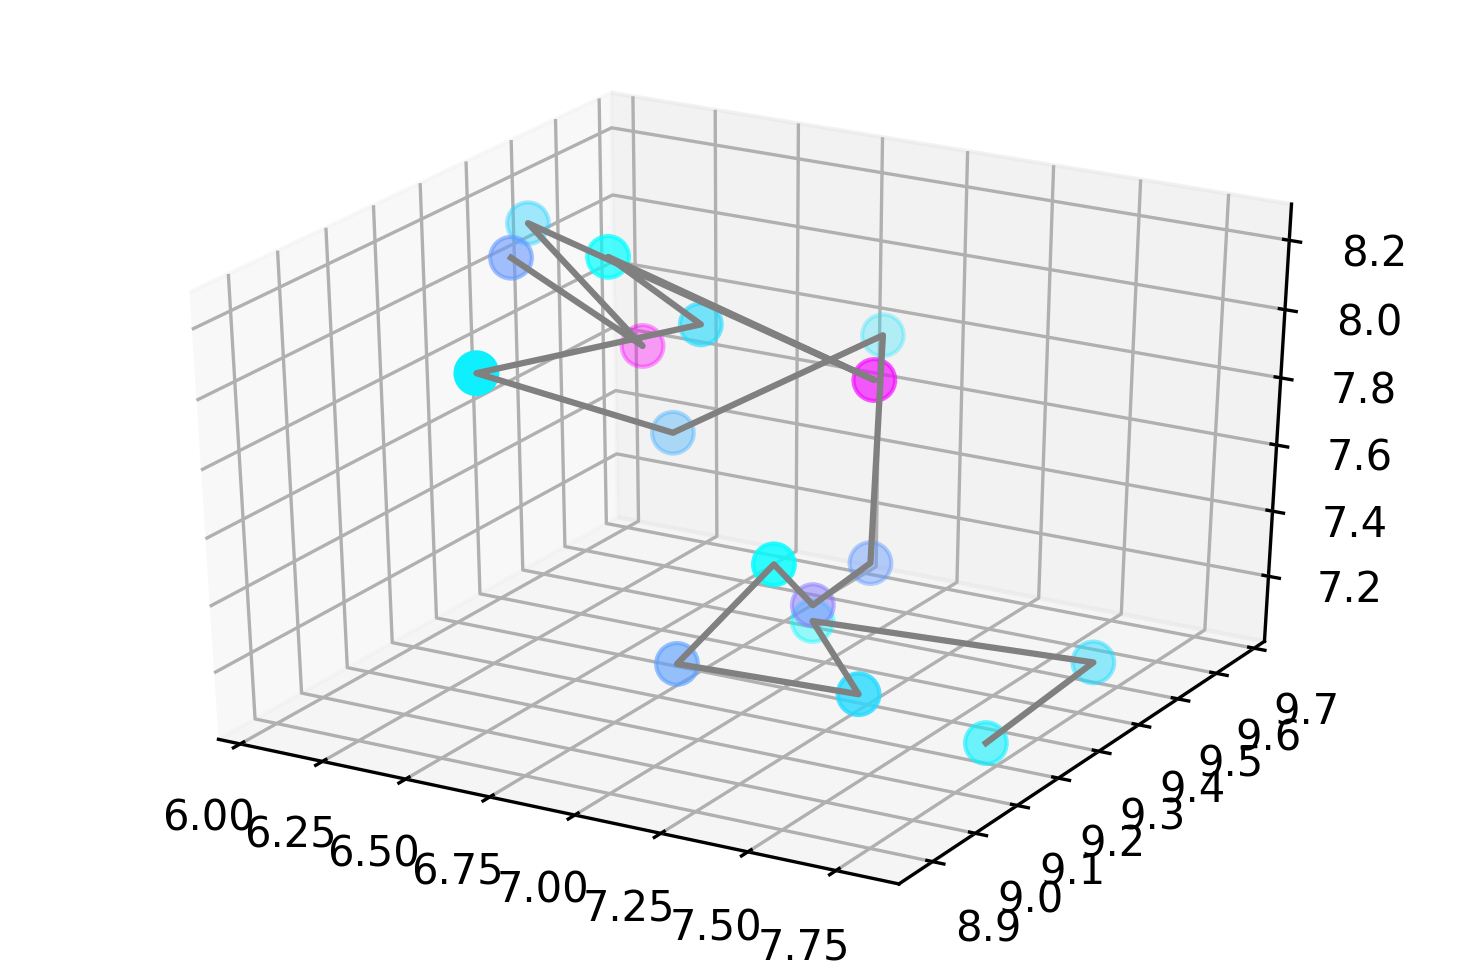

In [26]:
plt.figure(dpi=300)
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
x = track['Position X'].values
y = track['Position Y'].values
z = track['Position Z'].values
intensity = track['Value'].values
ax.plot3D(x, y, z, 'gray')

# Data for three-dimensional scattered points
#zdata = 15 * np.random.random(100)
#xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
#ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
#ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
ax.scatter3D(x, y, z, c=intensity, cmap='cool',s=100);

# plot them all

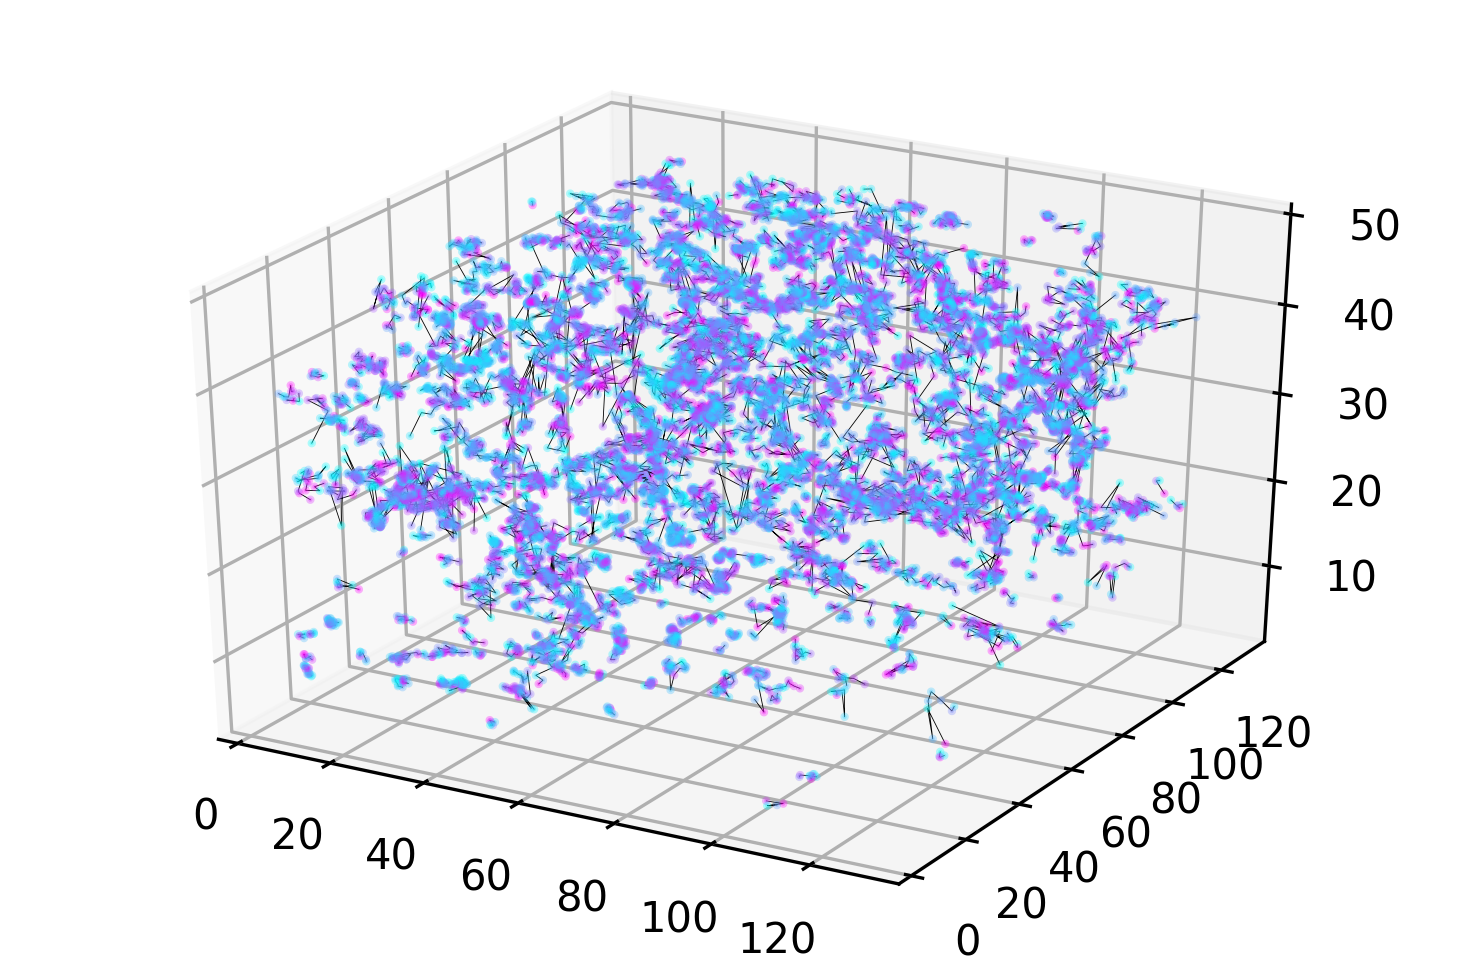

In [21]:
#plot them all

# WARNING: this takes ~3 min to plot.

#   plt.figure(dpi=300)
#   
#   
#   ax = plt.axes(projection='3d')
#   
#   for trackID in np.unique(data_chc['TrackID'].values):
#       
#       
#       track = data_chc[data_chc['TrackID'] == trackID]
#   
#       # Data for a three-dimensional line
#       x = track['Position X'].values
#       y = track['Position Y'].values
#       z = track['Position Z'].values
#       intensity = track['Value'].values
#       ax.plot3D(x, y, z, 'k',lw=0.2)
#       ax.scatter3D(x, y, z, c=intensity, cmap='cool',s=1,alpha=0.3);

In [14]:
nrows = len(data_chc['TrackID'].values)
ntracks = len(np.unique(data_chc['TrackID'].values))
print("nrows",nrows)
print("ntracks",ntracks)



nrows 15529
ntracks 1208
